# Setting up Workbook

## Import relevant files

In [1]:
import tools as tools
import classifier as classify
import fitting as fit
import ResonanceMethods as rem
import ResonancePipeline
from ResonancePipeline import ResonancePipeline

import os
import numpy as np
import matplotlib.pyplot as plt

## Define directories and load parent class

In [2]:
USBdirectory = '/Volumes/POCKETLAB/LSI/data/'
directory = 'data/'
folder = '2024-03-14/'
target_dir = 'output/'+folder

res = ResonancePipeline(USBdirectory, folder, target_dir)

# Data Import and Classification

* All data matching relevant file extension is loaded into workbook
* All data is stored in data_dictionary according to filename
* Individual datasets can be accessed from data_dictionary using relevant filename
    * Data is classified into different types: time, resonance, fwhm
    * Error removal and background corrections can be performed before analysis

In [3]:
res.load_data(type='txt', mac = True)

Available folders:  ['Analyse14Mar24Meas2Ana0.txt', 'Analyse14Mar24Meas3Ana0.txt', 'Analyse14Mar24Meas4Ana0.txt', 'Analyse14Mar24Meas5Ana0.txt']
Available data files in data_folder:  dict_keys(['Analyse14Mar24Meas2Ana0', 'Analyse14Mar24Meas3Ana0', 'Analyse14Mar24Meas4Ana0', 'Analyse14Mar24Meas5Ana0'])


In [4]:
data_dictionary = res.data_dictionary
print(res.data_dictionary.keys())

dict_keys(['Analyse14Mar24Meas2Ana0', 'Analyse14Mar24Meas3Ana0', 'Analyse14Mar24Meas4Ana0', 'Analyse14Mar24Meas5Ana0'])


## Selecting individual dataset to analyse

Select file from dictionary to analyse using the appropriate filename as a string

In [5]:
filename = 'Analyse14Mar24Meas5Ana0'
datafile = data_dictionary[filename]

Classify data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


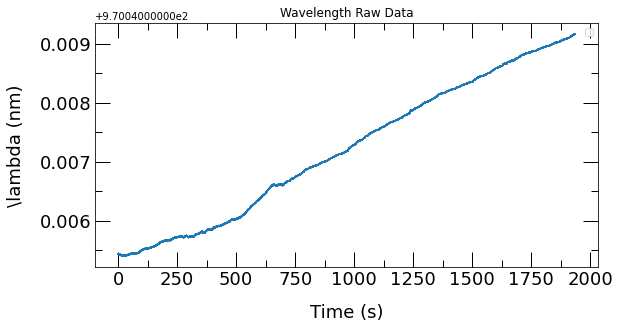

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


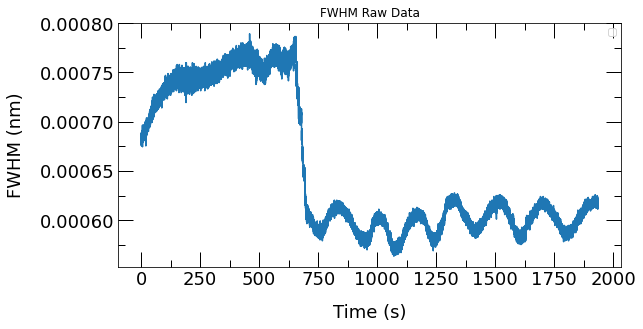

In [6]:
data_parameters = res.classify_data(datafile)

time = res.data_parameters['time']
resonance = res.data_parameters['resonance']
fwhm = res.data_parameters['fwhm']

Remove errors in data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


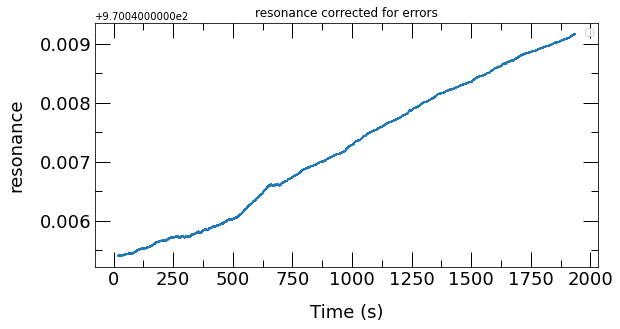

dict_keys(['time', 'resonance', 'fwhm', 'resonance_cut'])


In [7]:
data_parameter = 'resonance'
error_range = [0, 1000]

res.remove_errors(time, data_parameter, error_range)
print(res.data_parameters.keys())

Background correction if file available

Baseline =  970.0472139232294


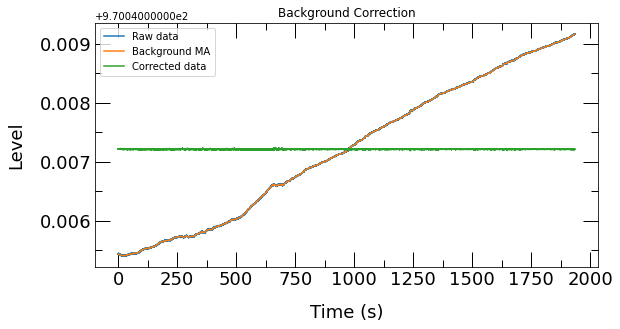

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


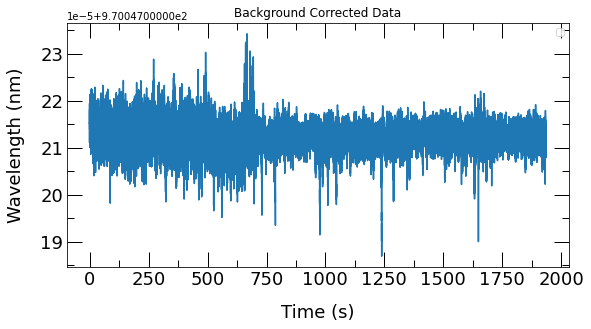

dict_keys(['Analyse14Mar24Meas2Ana0', 'Analyse14Mar24Meas3Ana0', 'Analyse14Mar24Meas4Ana0', 'Analyse14Mar24Meas5Ana0'])


In [8]:
data_parameter = 'resonance'
window_size = 100

res.correct_background(data_parameter, window_size)
print(res.data_dictionary.keys())

# Data Analysis

# Step Finder

* Data convolution with step function kernel for identifying steps in data.
* Finds the step indices and step heights from the maxima and minima peaks in the resultant data convolution
* Convolution parameters saved as steps_resonance_parameters.npy in output directory
NOTE: Step finder works best for non-background corrected data

In [9]:
#Data to analyse
x = res.data_parameters['time']
y = res.data_parameters['resonance']
#Select x indices interval to analyse
interval = [0, len(y)]

1  windows to sample
window  0


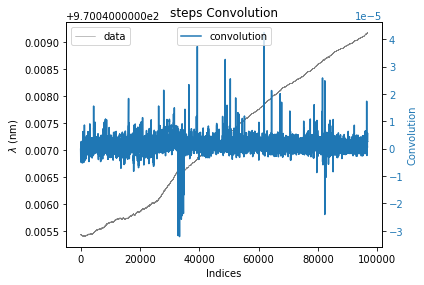

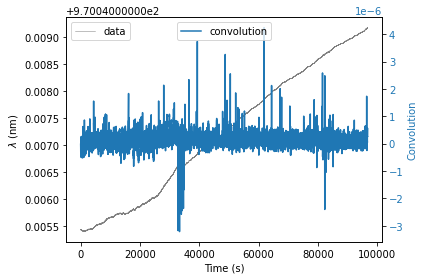

52  peak maxima found at t =  [4372.045201244791, 4901.050670471346, 7932.082007381905, 8381.086649504254, 8506.087941854574, 8728.090237068742, 16146.166930306132, 16371.169256536707, 20409.211004621444, 20642.21341356244, 20864.21570877661, 23711.245143347496, 23779.24584638607, 26280.271703731272, 27993.289414100058, 29097.300828138083, 29909.309223245764, 31295.32355282611, 31323.32384231258, 31572.32641667442, 35155.36346060399, 36474.37709748457, 39006.40327533265, 39325.40657341066, 47844.49464966967, 48724.50374781593, 49345.51016821231, 50440.52148920112, 52247.54017141734, 52999.54794619687, 53343.55150274495, 54476.56321660825, 55206.57076393412, 60082.6211759354, 61740.63831767005, 61823.63917579066, 61878.6397444248, 64350.665301944726, 67230.6950776961, 67733.70027811379, 70511.72899930729, 75182.77729185406, 77398.80020264053, 78706.81372579427, 79341.8202909339, 79635.82333054185, 81430.84188869245, 81518.84279850707, 82299.85087311188, 84009.86855246425, 85108.87991480

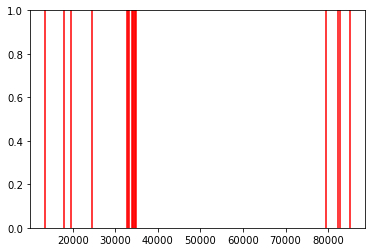

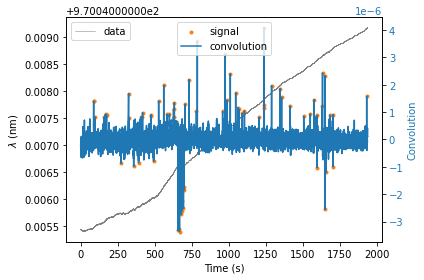

In [10]:
#Step discrimination settings (in number of data indeces)
#Reduce window size to apply step finder to smaller parts of data
window_size = len(y)
#mnimum height of step by number of standard deviations from mean
dev = 3
#minimum distance between adjacent steps
distance = 10
#minimum step width
width = 10

res.find_signal(x, y, type = 'steps', interval=interval, window_size=window_size, dev=dev, distance=distance, width=width)

# Spike Finder

* Data convolution with spike function kernel for identifying spikes in data.
    * Spike kernel can be modified in the 'convolve' function from ResonanceMethods
* Finds the spike indices and spike heights from the maxima and minima peaks in the resultant data convolution
* Convolution parameters saved as spikes_resonance_parameters.npy in output directory
NOTE: Spike finder works best on background corrected data

In [11]:
#Data to analyse
x = res.data_parameters['time']
y = res.data_parameters['resonance_corr']
#Select x indices interval to analyse
interval = [0, len(y)]

1  windows to sample
window  0


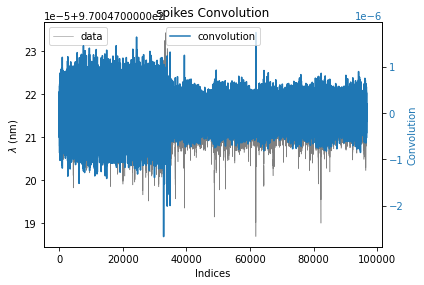

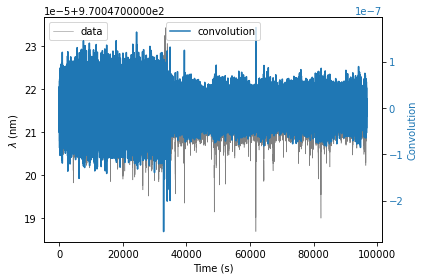

0  peak maxima found at t =  []
1  peak minima found at t =  [33316.34480046365]
1 [33316]
1 [33316]
96586
1 [-1.1064270225984841e-06]


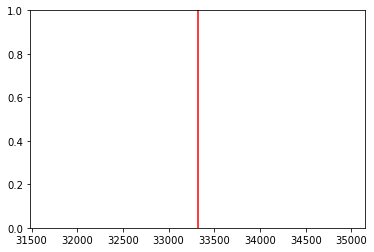

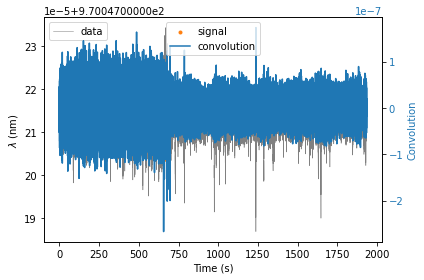

In [12]:
#Spike discrimination settings (in number of data indeces)
#Reduce window size to break up spike finder onto smaller parts of data
window_size = len(y)
#mnimum height of spike by number of standard deviations from mean
dev = 3
#minimum distance between adjacent spikes
distance = 10
#minimum spike width
width = 3

res.find_signal(x, y, type = 'spikes', interval=interval, window_size=window_size, dev=dev, distance=distance, width=width)

Load steps/spikes resonance parameters from relevant .npy files
* Convolution parameters stored in dictionary res.signal_parameters:
    * maxima/minima = identified peak indices from convolution plot
    * step_indices = x index of identified steps
    * steps = corresponding step heights
    

dict_keys(['maxima', 'minima', 'steps_indices', 'steps', 'steps_excluded', 'convolutions'])
[4372, 4901, 7932, 8381, 8506, 8728, 16146, 16371, 20409, 20642, 20864, 23711, 23779, 26280, 27993, 29097, 29909, 31295, 31323, 31572, 35155, 36474, 39006, 39325, 47844, 48724, 49345, 50440, 52247, 52999, 53343, 54476, 55206, 60082, 61740, 61823, 61878, 64350, 67230, 67733, 70511, 75182, 77398, 78706, 79341, 79635, 81430, 81518, 82299, 84009, 85108, 96405, 13577, 17865, 19510, 24580, 32793, 33038, 33315, 33928, 34092, 34214, 34639, 34711, 34831, 79600, 82275, 82757, 85082]
[1.402280011903782e-05, 8.10778013588857e-06, 8.105640140330034e-06, 9.291350156546068e-06, 8.429650106209702e-06, 9.022110166243474e-06, 1.6787370143320695e-05, 7.978720154697622e-06, 8.252600102751567e-06, 8.34696012121709e-06, 9.800280154068568e-06, 8.429000158558447e-06, 9.005280137317422e-06, 1.4045190105080802e-05, 1.9827200114705885e-05, 9.12967011332581e-06, 9.224000118466174e-06, 1.1104780114565764e-05, 8.024070118481

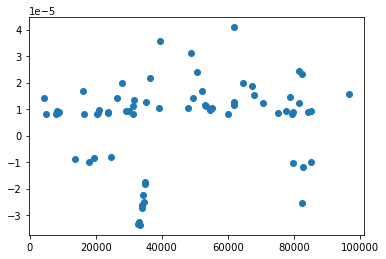

In [13]:
filename = 'steps_resonance_parameters.npy'
type = 'steps'
res.load_signal_parameters(filename, type)

res.signal_parameters
print(res.signal_parameters.keys())

print(res.signal_parameters['steps_indices'])
print(res.signal_parameters['steps'])

plt.scatter(res.signal_parameters['steps_indices'], res.signal_parameters['steps'])
plt.show()

# Analysing Positive and Negative Steps/Spikes

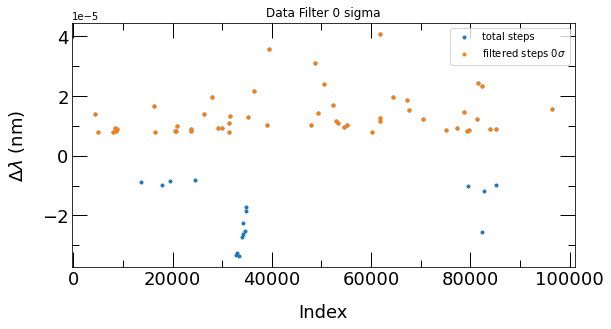

In [14]:
steps_indices = res.signal_parameters['steps_indices']
steps_heights = res.signal_parameters['steps']
#Select step type to analyse: 'both', 'positive' or 'negative'
stype = 'positive'
#Optional additional filter with standard deviation threshold
dev = 0

iselected, selected = res.dev_selection(steps_indices, steps_heights, stype = stype, dev = dev)


Comparing positive and negative steps

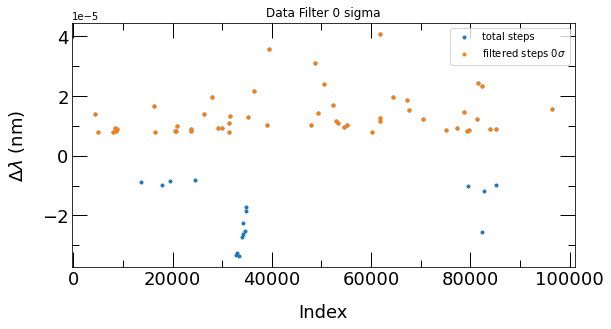

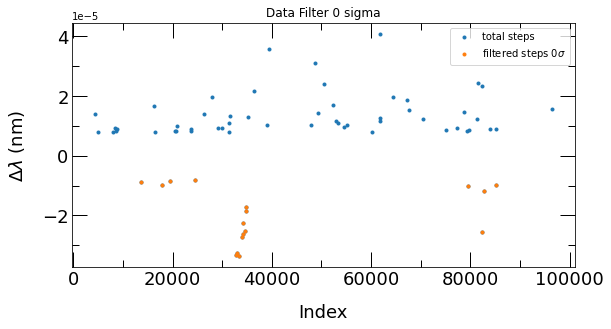

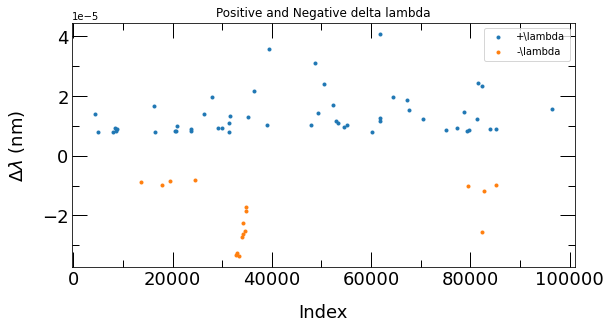

In [15]:
pos_indices, pos_heights = res.dev_selection(steps_indices, steps_heights, stype = 'positive', dev = 0)
neg_indices, neg_heights = res.dev_selection(steps_indices, steps_heights, stype = 'negative', dev = 0)

tools.xy_plot([[pos_indices, pos_heights], [neg_indices, np.array(neg_heights)]], type='beat_timelines', label_variable = [r'+\lambda', r'-\lambda'], aspect = 0.5, yerror = None, x_label = 'Index', y_label = r'$\Delta \lambda$ (nm)', title = 'Positive and Negative delta lambda', box = False, save = True, target_dir = target_dir)


## Histogram Plot

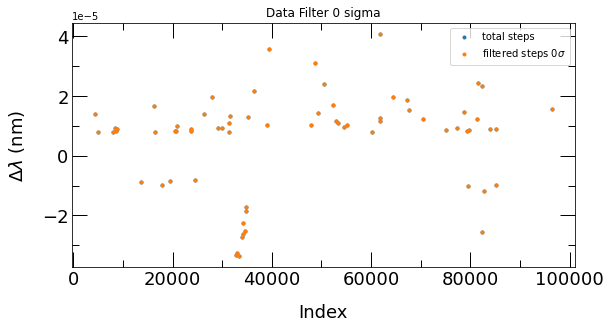

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


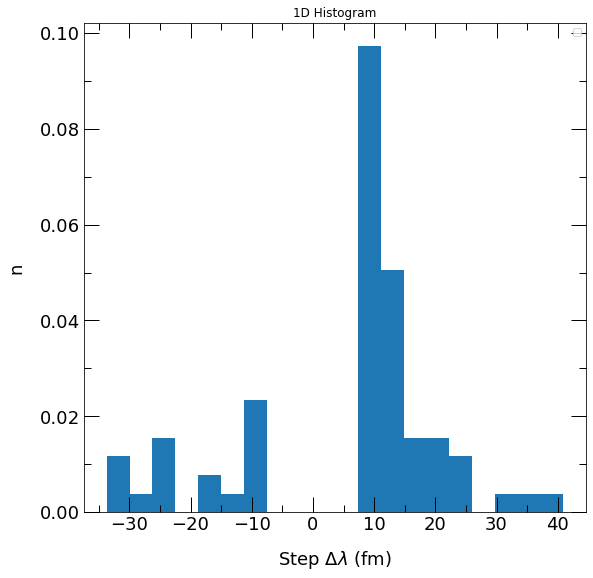

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


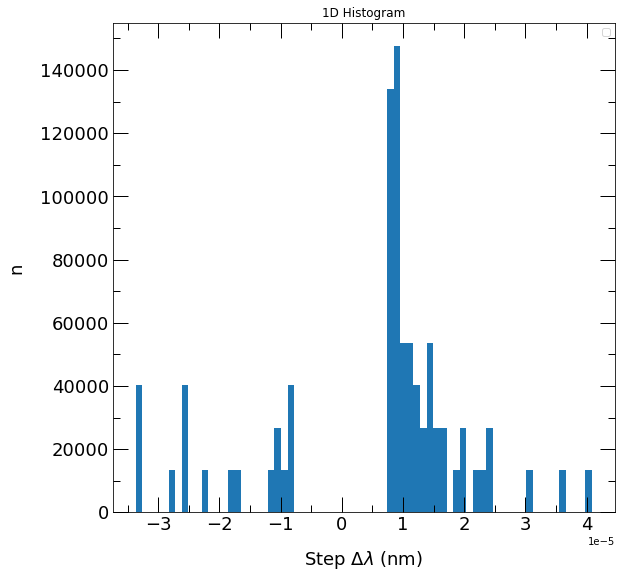

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


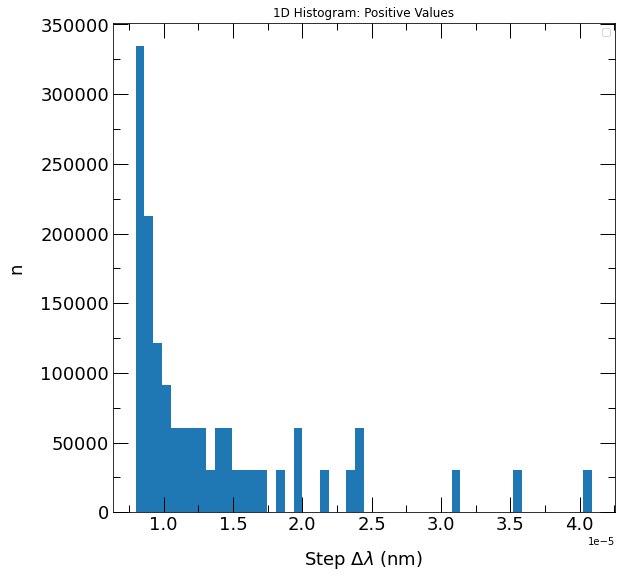

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


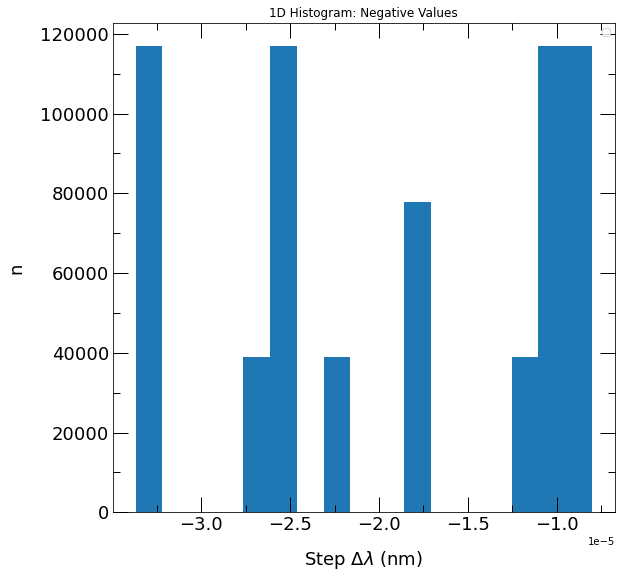

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


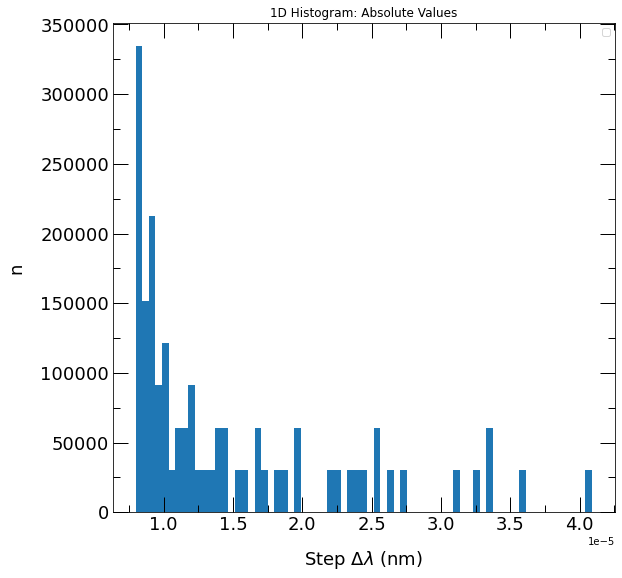

In [16]:
#Data to analyse
iselected, selected = res.dev_selection(steps_indices, steps_heights, stype = 'both', dev = 0)
selected_data = [iselected, selected]

hist_data= [f*10**6 for f in selected_data[1]]
tools.xy_plot([hist_data, 20], type = 'histogram', aspect = 1.0, yerror = None, x_label = r'Step $\Delta \lambda$ (fm)', y_label = 'n', title = '1D Histogram', box = False, save = True, target_dir = target_dir)

res.get_stats(iselected, selected, n_bins = None, split = True, abso = True)

## Histogram: Single Gaussian Fit

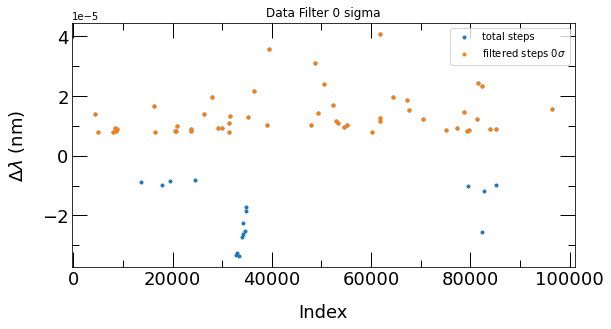

[1.402280011903782e-05, 8.10778013588857e-06, 8.105640140330034e-06, 9.291350156546068e-06, 8.429650106209702e-06, 9.022110166243474e-06, 1.6787370143320695e-05, 7.978720154697622e-06, 8.252600102751567e-06, 8.34696012121709e-06, 9.800280154068568e-06, 8.429000158558447e-06, 9.005280137317422e-06, 1.4045190105080802e-05, 1.9827200114705885e-05, 9.12967011332581e-06, 9.224000118466174e-06, 1.1104780114565764e-05, 8.024070118481869e-06, 1.3386440113991521e-05, 1.2851440121595042e-05, 2.184876011357188e-05, 1.0248810142330293e-05, 3.582088007520793e-05, 1.0238310139685163e-05, 3.106092015956234e-05, 1.4308900117485573e-05, 2.397822013095789e-05, 1.7010660187552966e-05, 1.1635330119916725e-05, 1.1111880119061207e-05, 9.514880125480668e-06, 1.0387830090949828e-05, 8.08009013768311e-06, 1.2681670145739881e-05, 4.088561014201401e-05, 1.1672810112359693e-05, 1.970647015001374e-05, 1.855747012528878e-05, 1.5420170175148778e-05, 1.2216030140608164e-05, 8.510950133186961e-06, 9.300230167228402e-0

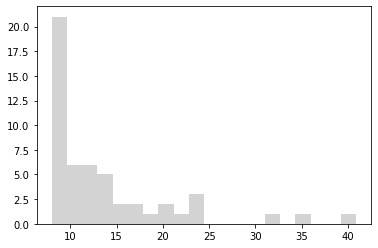

Expected:  (24.432165148355814, 9.487519214366797, 21.0)
Fit parameters =  [48.52525561 -0.84270369  2.70581344]


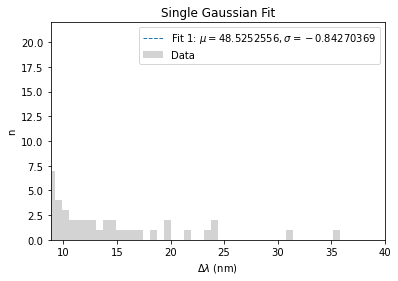

In [17]:
#Select step type to analyse: 'both', 'positive' or 'negative'
stype = 'positive'
#Optional additional filter with standard deviation threshold
dev = 0

iselected, selected = res.dev_selection(steps_indices, steps_heights, stype = stype, dev = dev)
print(selected)
hist_data= [f*10**6 for f in selected]

fit_params, single_gaussian = res.fit_gaussian(hist_data, ind = 0, save = True)


## Analyse Temporal Statistics

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0  counts detected in window
0  counts detected in window
0
1
2  counts detected in window
2
1  counts detected in window
3
4
5
3  counts detected in window
0  counts detected in window
0  counts detected in window
0  counts detected in window
6
7
2  counts detected in window
0  counts detected in window
8
9
10
3  counts detected in window
11
12
2  counts detected in window
0  counts detected in window
13
14
2  counts detected in window
15
16
2  counts detected in window
17
18
19
3  counts detected in window
0  counts detected in window
20
1  counts detected in window
21
1  counts detected in window
22
23
2  counts detected in window
0  counts detected in window
0  counts detected in window
0  counts detected in window
24
1  counts detected in window
25
26
2  counts detected in window
27
1  counts detected in window
28
29
30
3  counts detected in window
31
32
2  counts detected in window
0  counts detected in window
0  counts detected in window
33
34
35
36
4  counts detected in window


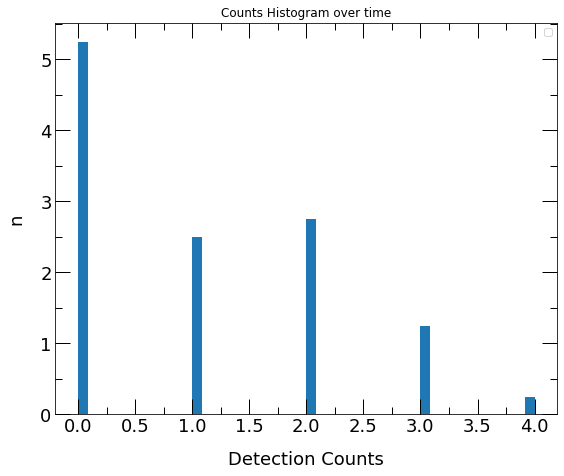

Counts list across 48 windows of size 2000:
   direc: array([[4.59114475e-05]])
     fun: 67.66961445000943
 message: 'Optimization terminated successfully.'
    nfev: 39
     nit: 2
  status: 0
 success: True
       x: array([1.0625])


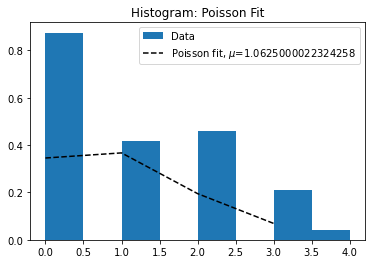

Total counts =  51


In [18]:
#Data to analyse
selected_data = [iselected, selected]
#Window size over which to count number of detected steps/spikes
window = 2000
#Number of histogram bins
h_bins = None
#Fit poisson distribution
fit_poisson = True

counts, poisson_fit = res.get_temporal_stats(y, selected_data[0], selected_data[1], window = window, h_bins = h_bins, fit_poisson = fit_poisson)

total_counts = np.sum(counts)
print('Total counts = ', total_counts)

